Среднеквадратическая ошибка (MSE): 0.0106
Коэффициент детерминации (R^2): 0.9909
Пиковое отношение сигнал/шум (PSNR): 25.05 дБ


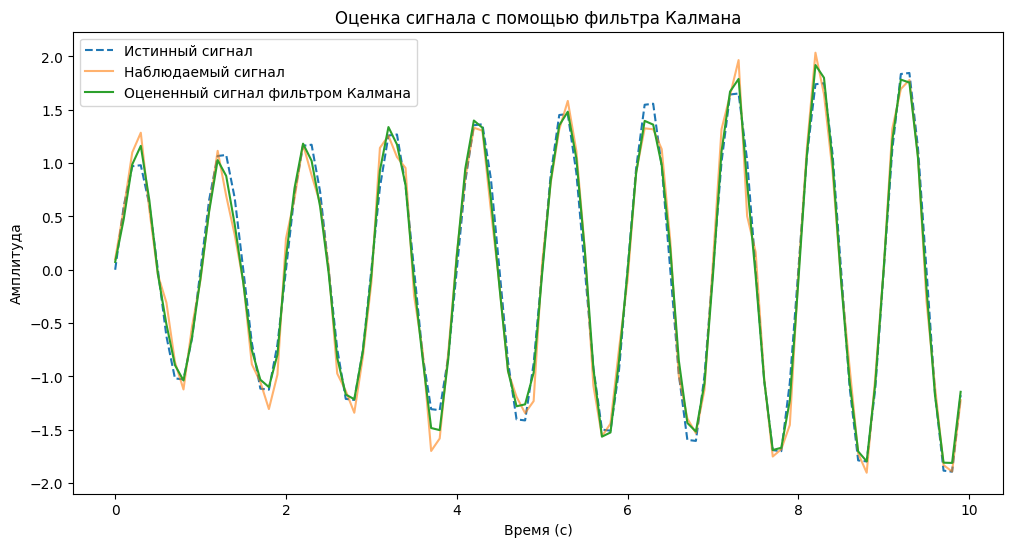

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры сигнала
np.random.seed(42)
T = 100  # Количество временных шагов
dt = 0.1  # Шаг времени
f = 1  # Частота сигнала (Гц)
true_amplitude = np.linspace(1, 2, T)  # Линейно изменяющаяся амплитуда
noise_std = 0.2  # Стандартное отклонение шума

# Генерация сигнала
time = np.arange(T) * dt
true_signal = true_amplitude * np.sin(2 * np.pi * f * time)
observed_signal = true_signal + np.random.normal(0, noise_std, T)

# Инициализация фильтра Калмана
F = np.array([[1, dt, 0, 0],
              [0, 1, 0, 0],
              [0, 0, np.cos(2 * np.pi * f * dt), -np.sin(2 * np.pi * f * dt)],
              [0, 0, np.sin(2 * np.pi * f * dt), np.cos(2 * np.pi * f * dt)]])
H = np.array([[0, 0, 1, 0]])
Q = np.diag([0.1, 0.1, 0.01, 0.01])  # Шум процесса
R = np.array([[noise_std**2]])  # Шум наблюдения
z = np.array([1, 0, 0, 1])  # Начальное состояние
P = np.eye(4)  # Ковариационная матрица ошибки

# Массивы для хранения оценок
estimated_amplitude = []
estimated_signal = []

# Фильтр Калмана
for k in range(T):
    # Шаг предсказания
    z = F @ z
    P = F @ P @ F.T + Q

    # Шаг обновления
    y = observed_signal[k]  # Наблюдение
    S = H @ P @ H.T + R
    K = P @ H.T @ np.linalg.inv(S)
    z = z + K.flatten() * (y - H @ z)
    P = (np.eye(4) - K @ H) @ P

    # Сохранение результатов
    estimated_amplitude.append(z[0])
    estimated_signal.append(z[0] * z[2])

# Метрики
estimated_signal = np.array(estimated_signal)
mse = np.mean((true_signal - estimated_signal) ** 2)
r2 = 1 - np.sum((true_signal - estimated_signal) ** 2) / np.sum((true_signal - np.mean(true_signal)) ** 2)
psnr = 10 * np.log10(np.max(true_signal) ** 2 / mse)

print(f"Среднеквадратическая ошибка (MSE): {mse:.4f}")
print(f"Коэффициент детерминации (R^2): {r2:.4f}")
print(f"Пиковое отношение сигнал/шум (PSNR): {psnr:.2f} дБ")

# Графики
plt.figure(figsize=(12, 6))
plt.plot(time, true_signal, label="Истинный сигнал", linestyle="--")
plt.plot(time, observed_signal, label="Наблюдаемый сигнал", alpha=0.6)
plt.plot(time, estimated_signal, label="Оцененный сигнал фильтром Калмана")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.legend()
plt.title("Оценка сигнала с помощью фильтра Калмана")
plt.show()

